In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.pandas.set_option('display.max_columns', None)
sns.set_style("whitegrid")
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [3]:
dataset = pd.read_csv("C:\\Users\\henry\\Desktop\\Flights\\clean_flight_df.csv")

C:\Users\henry\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Check the shape of our data set

# Findings -> This dataset contains 28 features
dataset.shape

(5819079, 28)

#### Cancel Flights cannot have delay, so we are going to filter out our dataset by removing all flights which that are cancelled.

In [5]:
dataset = dataset[dataset.CANCELLED == 0]
dataset.shape

(5729195, 28)

In [6]:
dataset.dtypes

Unnamed: 0               int64
YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE     object
DEPARTURE_TIME          object
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL       object
ARRIVAL_TIME            object
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
DATE                    object
dtype: object

In [7]:
dataset.head()

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,DATE
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,00:05:00,23:54:00,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,04:30:00,04:08:00,-22.0,0,0,ON,2015-01-01
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,00:10:00,00:02:00,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,07:50:00,07:41:00,-9.0,0,0,ON,2015-01-01
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,00:20:00,00:18:00,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,08:06:00,08:11:00,5.0,0,0,ON,2015-01-01
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,00:20:00,00:15:00,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,08:05:00,07:56:00,-9.0,0,0,ON,2015-01-01
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,00:25:00,00:24:00,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,03:20:00,02:59:00,-21.0,0,0,ON,2015-01-01


In [8]:
# This dataset contains several columns we don't need for analysis and for our model

dataset.drop(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'CANCELLED', 'CANCELLATION_REASON'], axis=1, inplace=True)

# Numerical Variables ( Features ) and Distribution of Numerical Variables

In [9]:
# Get all the numerical features from our dataset
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']

print(f'Number of Numerical Features: {len(numerical_features)}')

# Overview of our dataframe w/ only numerical featuers
dataset[numerical_features].head()

Number of Numerical Features: 13


,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,DIVERTED
0,4,98,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,-22.0,0
1,4,2336,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,-9.0,0
2,4,840,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,5.0,0
3,4,258,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,-9.0,0
4,4,135,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,-21.0,0


# Discrete Features

In [10]:
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) <= 25]

print(f'Numer of Discrete Features: {len(discrete_features)}')

dataset[discrete_features].head()

Numer of Discrete Features: 2


,DAY_OF_WEEK,DIVERTED
0,4,0
1,4,0
2,4,0
3,4,0
4,4,0


#### In this notebook, we are trying to predict teh departure delay. We will look at each of the discrete variable to see the impact it has on departure_delay.

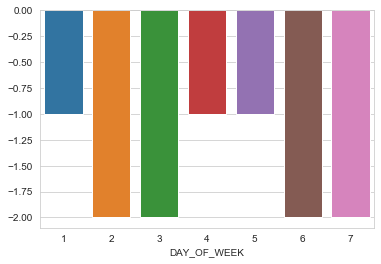

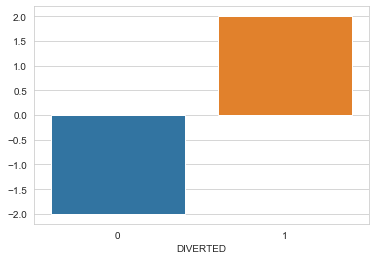

In [11]:
for feature in discrete_features:  
    data = dataset.copy()
    data = data.groupby(feature)['DEPARTURE_DELAY'].median()
    sns.barplot(x=data.index, y=data.values)
    plt.show()

#### The previous two graphs gives us some good insight. It seems most of the time departure delay doesn't really happen. It also seems like departure delay occurs much more frequently given that flight is actually delayed.

#### Since departure delay is actually rare, we will now take a deep look in the event there is actually delay what actually happens.

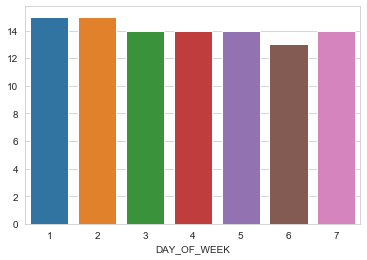

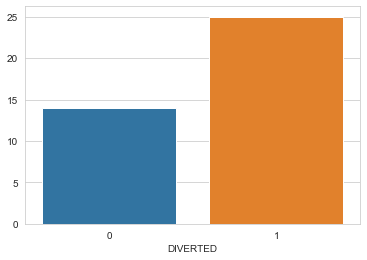

In [12]:
for feature in discrete_features:
    data = dataset.copy()
    data = data[data.DEPARTURE_DELAY > 0]
    data = data.groupby(feature)['DEPARTURE_DELAY'].median()
    sns.barplot(x=data.index, y=data.values)
    plt.show()

#### Nothing too unusual with day of the week, relatively uniform. Given that a flight is diverted it seems like the time of delay actual increases. This is nothing out of the ordinary and it is to be expected.

#### Through the filtering we applied to our dataset, we can see that the dataset does not contain many discrete features. We can conclude that majority of our numerical features are continuous.

# Continuous Features

In [13]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

print(f'Number of Continuous Features: {len(continuous_features)}')

dataset[continuous_features].head()

Number of Continuous Features: 11


,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY
0,98,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,-22.0
1,2336,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,-9.0
2,840,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,5.0
3,258,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,-9.0
4,135,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,-21.0


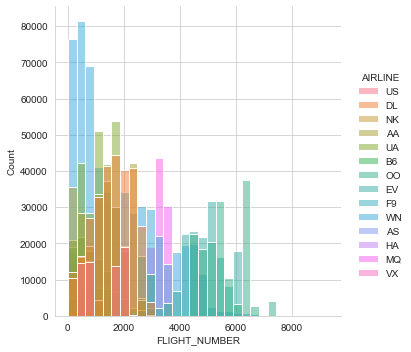

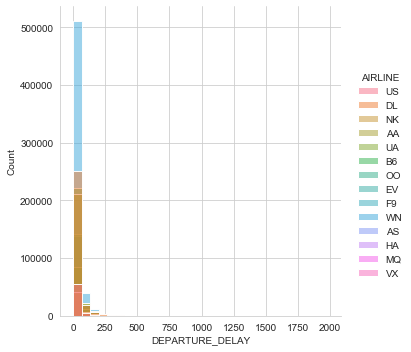

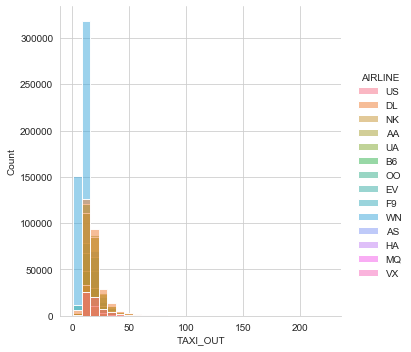

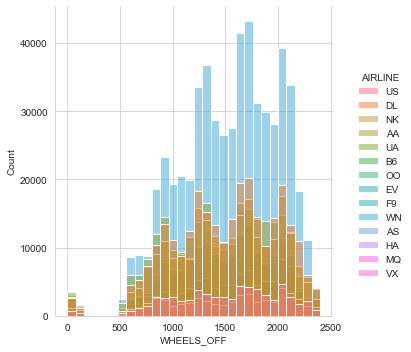

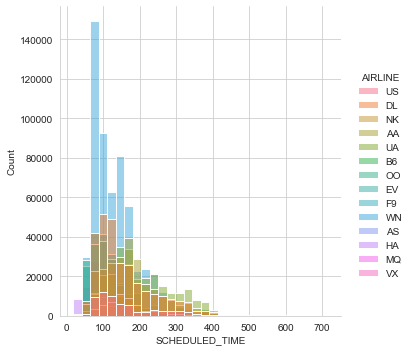

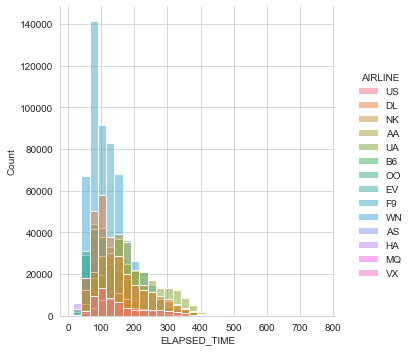

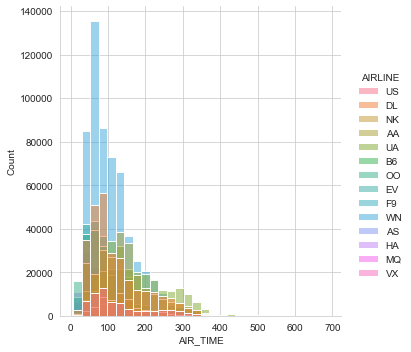

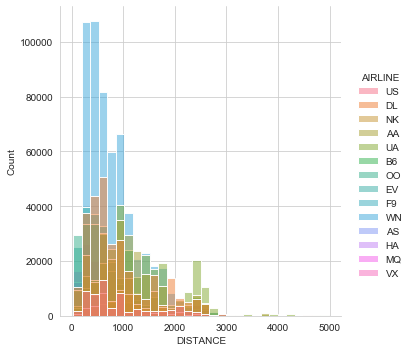

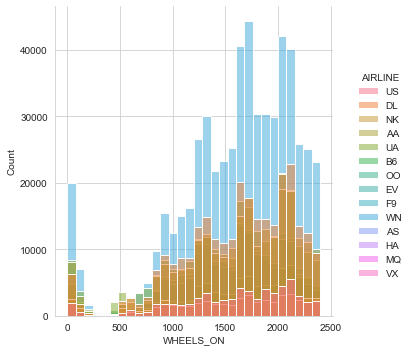

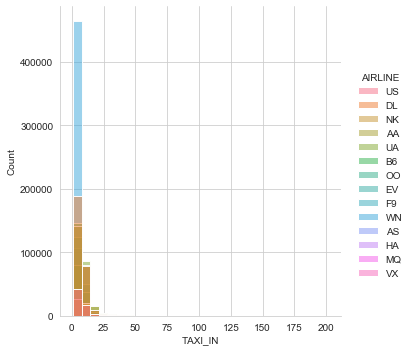

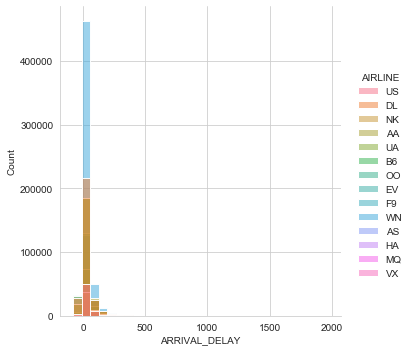

In [17]:
# Overview on the continuous_features distribution
# We will also like to look at the distribute with the extra information -> airlines

for feature in continuous_features:
    
    data = dataset.copy()
    data = dataset[dataset.DEPARTURE_DELAY > 0]
    sns.displot(data, x=feature, bins=30, hue='AIRLINE')
    plt.show()

# Categorical Variables ( Features )

In [18]:
categorical_features = [feature for feature in dataset.columns if feature not in numerical_features]

print(f'Number of Categorical Features: {len(categorical_features)}')

dataset[categorical_features].head()

Number of Categorical Features: 9


,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,SCHEDULED_ARRIVAL,ARRIVAL_TIME,DATE
0,AS,N407AS,ANC,SEA,00:05:00,23:54:00,04:30:00,04:08:00,2015-01-01
1,AA,N3KUAA,LAX,PBI,00:10:00,00:02:00,07:50:00,07:41:00,2015-01-01
2,US,N171US,SFO,CLT,00:20:00,00:18:00,08:06:00,08:11:00,2015-01-01
3,AA,N3HYAA,LAX,MIA,00:20:00,00:15:00,08:05:00,07:56:00,2015-01-01
4,AS,N527AS,SEA,ANC,00:25:00,00:24:00,03:20:00,02:59:00,2015-01-01


#### There are 10 categorical features, but some of the categorical features are related to datetime. We will ignore those at this moment and focus on the categorical featues and there impact on delay time.

In [19]:
new_categorical_features = ['AIRLINE', 'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

for feature in new_categorical_features:
    print(f'{feature} : Number of Features - {len(dataset[feature].unique())}')

AIRLINE : Number of Features - 14
TAIL_NUMBER : Number of Features - 4896
ORIGIN_AIRPORT : Number of Features - 929
DESTINATION_AIRPORT : Number of Features - 930


#### There are too many features with tail_numbers, and tail number is associated with a specific airline. At this moment, it would be best if we ignore this feature for now.

#### At this point, we are going to explore our in the perspective of the airline.

In [20]:
airlines = dataset.groupby('AIRLINE').mean()
airlines

,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,ARRIVAL_DELAY,DIVERTED
AIRLINE,,,,,,,,,,,,,
AA,3.954689,1280.883546,8.864029,17.769120,1339.458248,171.869936,166.433282,139.806208,1042.841275,1486.907721,8.876172,3.451372,0.002979
AS,3.990585,427.723093,1.778455,15.094197,1343.842132,182.039185,179.339788,157.844784,1198.714766,1491.344739,6.401667,-0.976563,0.002403
B6,3.998877,910.933353,11.499049,17.872380,1361.281476,172.789411,167.838858,143.858492,1064.453968,1438.586664,6.121373,6.677861,0.002778
DL,3.911303,1615.984553,7.354815,17.608149,1360.408949,147.634799,140.471965,115.665353,853.873231,1489.333000,7.209058,0.186754,0.002043
EV,3.905075,4708.870688,8.663310,16.736153,1356.966110,99.214608,97.124247,72.763842,462.121538,1465.295267,7.635511,6.585379,0.003582
F9,3.973152,819.281524,13.317470,15.674198,1377.926436,155.882003,155.056677,130.240571,967.357759,1471.239086,9.147244,12.504706,0.001751
HA,4.014862,217.445316,0.483489,10.953483,1321.236988,101.219485,102.672269,84.881314,632.855521,1418.048270,6.841194,2.023093,0.000788
MQ,3.934966,3313.638131,10.014910,16.548148,1361.638142,96.157614,92.593516,66.979630,423.084683,1454.319725,9.084096,6.457873,0.002918
NK,4.019094,541.340299,15.911281,14.603710,1376.910267,157.934179,156.503598,132.347886,985.912269,1437.680900,9.556557,14.471800,0.001577


In [26]:
# Count the number of flights for each airline
total_flights_by_airline = dataset.groupby('AIRLINE')['FLIGHT_NUMBER'].count()
number_delay_by_airline = dataset[dataset.DEPARTURE_DELAY > 0].groupby('AIRLINE')['DEPARTURE_DELAY'].count()
delay_percentage = np.round((number_delay_by_airline / total_flights_by_airline) * 100, 4)
delay_frame = pd.DataFrame({'Total Number of Flights': total_flights_by_airline, 'Count of Delayed Airlines': number_delay_by_airline, 'Percentage Delayed': delay_percentage.values})
delay_frame.sort_values(by='Percentage Delayed', ascending=False)

,Total Number of Flights,Count of Delayed Airlines,Percentage Delayed
AIRLINE,,,
UA,509150,256241,50.3272
WN,1245812,566583,45.4790
NK,115375,52033,45.0990
B6,262772,102012,38.8215
F9,90248,34859,38.6258
VX,61369,23366,38.0746
AA,715065,245550,34.3395
MQ,279607,93232,33.3439
DL,872057,282385,32.3815


#### From this table, we see the amount of flights get delayed. This still does not really give us the whole picture, since in this chart we value delaying by 1 minute and 1hr the same. We can probably further split the data to give us a better overview of the situation.

In [42]:
dataset[dataset.DEPARTURE_DELAY > 0]['DEPARTURE_DELAY'].describe()

count    2.123078e+06
mean     3.260838e+01
std      5.305559e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.400000e+01
75%      3.800000e+01
max      1.988000e+03
Name: DEPARTURE_DELAY, dtype: float64

#### We can see that the 3rd quartile is 38 minutes. So for the flights that was actually delayed, 75% of them is 38 minutes and under. It would be interesting to see which airline is has the most impact on 75% and above.

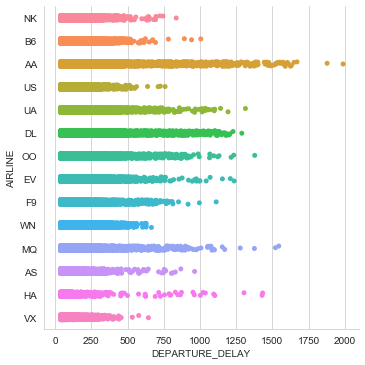

In [45]:
delay_dataset = dataset[dataset.DEPARTURE_DELAY > 38]
sns.catplot(x='DEPARTURE_DELAY' , y='AIRLINE' , data=delay_dataset)
plt.show()

#### This is pretty interesting. It is very hard to tell who actually has the most amount of delay about 38 mins from this graph, but we can see that some of these airlines hold a huge spread. We can definitely see that AA, had many instances where they have delays over 1250 mins, which is approximately 20 hours.

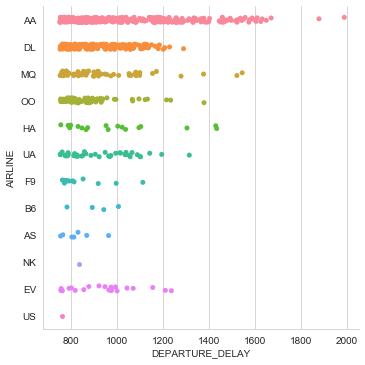

In [46]:
delay_dataset = dataset[dataset.DEPARTURE_DELAY > 750]
sns.catplot(x='DEPARTURE_DELAY' , y='AIRLINE' , data=delay_dataset)
plt.show()

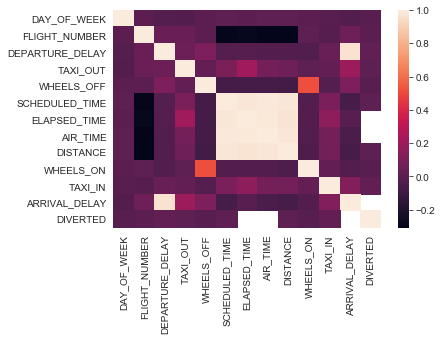

In [51]:
delay_dataset = dataset[dataset.DEPARTURE_DELAY > 0]
corr = delay_dataset.corr()
sns.heatmap(corr)

#### After performing a heat map, we can see what mainly Departure_Delay is highly correlated with Arrival_Daily. 

#### Problem - Correlation Matrix can only take numerical values in consideration. Categorical Values can potential make an impact.

#### Could Airport Play a Role in the Delay?

In [75]:
#origin_df = delay_dataset.groupby(['ORIGIN_AIRPORT', 'AIRLINE'])['DEPARTURE_DELAY'].sum().reset_index()
origin_df = delay_dataset.groupby(['ORIGIN_AIRPORT', 'AIRLINE'])['DEPARTURE_DELAY'].mean()
origin_df.head(20).sort_values(ascending=False)

ORIGIN_AIRPORT  AIRLINE
10154           B6         55.461538
10157           OO         53.828571
10146           EV         53.100000
10136           MQ         50.823529
10135           EV         46.080645
10140           AA         43.209302
10165           AS         36.800000
10140           B6         33.473684
                OO         27.775000
10155           EV         25.428571
10158           NK         23.479167
10170           AS         23.166667
10135           DL         21.333333
10141           OO         20.400000
10140           WN         19.797917
                UA         17.428571
                MQ         15.272727
                EV         12.000000
                DL         11.454545
                AS          8.250000
Name: DEPARTURE_DELAY, dtype: float64

In [64]:
origin_airport = origin_df.pivot('ORIGIN_AIRPORT', 'AIRLINE', 'DEPARTURE_DELAY')

In [74]:
# Draw a heatmap with the numeric values in each cell
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(origin_airport, annot=True, fmt="f", linewidths=.5, ax=ax)
#plt.show()

#### Impact of Flight Routes?

In [78]:
route_mean = delay_dataset.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['DEPARTURE_DELAY'].mean()
route_std = delay_dataset.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])['DEPARTURE_DELAY'].std()

ORIGIN_AIRPORT  DESTINATION_AIRPORT
10135           11433                  51.120000
10136           11298                  50.823529
10135           13930                  44.904762
10140           11298                  43.209302
10135           10397                  34.727273
10140           12478                  33.473684
                12892                  32.196429
                11292                  23.214286
                13198                  22.695652
                14057                  22.200000
                11259                  18.656250
                12889                  18.232143
                13930                  17.941176
                13796                  17.027027
                13232                  16.960000
                13487                  14.250000
                12266                  14.076923
                12191                  12.303030
                10397                  11.411765
                10821            

In [80]:
route_mean.head(10).sort_values(ascending=False)

ORIGIN_AIRPORT  DESTINATION_AIRPORT
10135           11433                  51.120000
10136           11298                  50.823529
10135           13930                  44.904762
10140           11298                  43.209302
10135           10397                  34.727273
10140           11292                  23.214286
                11259                  18.656250
                12191                  12.303030
                10397                  11.411765
                10821                  10.964286
Name: DEPARTURE_DELAY, dtype: float64

In [81]:
route_std.head(10).sort_values(ascending=False)

ORIGIN_AIRPORT  DESTINATION_AIRPORT
10135           13930                  94.622357
10140           11298                  77.261941
10135           11433                  66.656032
10136           11298                  66.318547
10135           10397                  48.193244
10140           11292                  33.088328
                11259                  24.072786
                10821                  20.249339
                10397                  15.215366
                12191                  11.424986
Name: DEPARTURE_DELAY, dtype: float64